**Robert's First Lab Assignment for Nano 281**

In [61]:
from pymatgen import MPRester
import seaborn as sns
from pprint import pprint
import pandas as pd

In [2]:
m = MPRester("Rxy9xMBBfweUTh2XbOv")

**Testing method of getting ABO3s**

In [3]:
test_data = m.get_data("**O3", prop="pretty_formula")
pprint(test_data)

[{'material_id': 'mp-1183115', 'pretty_formula': 'AcAlO3'},
 {'material_id': 'mp-1183052', 'pretty_formula': 'AcBO3'},
 {'material_id': 'mp-866101', 'pretty_formula': 'AcCrO3'},
 {'material_id': 'mp-864606', 'pretty_formula': 'AcCuO3'},
 {'material_id': 'mp-861502', 'pretty_formula': 'AcFeO3'},
 {'material_id': 'mp-1183053', 'pretty_formula': 'AcGaO3'},
 {'material_id': 'mp-1183142', 'pretty_formula': 'AcMgO3'},
 {'material_id': 'mp-864911', 'pretty_formula': 'AcMnO3'},
 {'material_id': 'mp-1183139', 'pretty_formula': 'AcNiO3'},
 {'material_id': 'mp-1183145', 'pretty_formula': 'AcPdO3'},
 {'material_id': 'mp-1183152', 'pretty_formula': 'AcScO3'},
 {'material_id': 'mp-1183150', 'pretty_formula': 'AcSiO3'},
 {'material_id': 'mp-865927', 'pretty_formula': 'AcTiO3'},
 {'material_id': 'mp-1183168', 'pretty_formula': 'AcVO3'},
 {'material_id': 'mp-558950', 'pretty_formula': 'AgAsO3'},
 {'material_id': 'mp-775767', 'pretty_formula': 'AgAsO3'},
 {'material_id': 'mp-1178563', 'pretty_formula': 

In [4]:
test_data2 = m.query(criteria="**O3", properties=["pretty_formula"])
pprint(test_data2)

/home/robert/miniconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)
/home/robert/miniconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)
/home/robert/miniconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)


[{'pretty_formula': 'CaFeO3'},
 {'pretty_formula': 'BaSiO3'},
 {'pretty_formula': 'BaGeO3'},
 {'pretty_formula': 'CdIrO3'},
 {'pretty_formula': 'CaRhO3'},
 {'pretty_formula': 'CaRuO3'},
 {'pretty_formula': 'CdRuO3'},
 {'pretty_formula': 'BaRhO3'},
 {'pretty_formula': 'BaMnO3'},
 {'pretty_formula': 'CaVO3'},
 {'pretty_formula': 'CaIrO3'},
 {'pretty_formula': 'CaHfO3'},
 {'pretty_formula': 'CdRhO3'},
 {'pretty_formula': 'CdSiO3'},
 {'pretty_formula': 'CdSnO3'},
 {'pretty_formula': 'CdOsO3'},
 {'pretty_formula': 'CaGeO3'},
 {'pretty_formula': 'CaOsO3'},
 {'pretty_formula': 'CdGeO3'},
 {'pretty_formula': 'BaVO3'},
 {'pretty_formula': 'CaMnO3'},
 {'pretty_formula': 'BaRuO3'},
 {'pretty_formula': 'BaZrO3'},
 {'pretty_formula': 'CeGaO3'},
 {'pretty_formula': 'BaCoO3'},
 {'pretty_formula': 'BaCuO3'},
 {'pretty_formula': 'BaTiO3'},
 {'pretty_formula': 'CeAsO3'},
 {'pretty_formula': 'CaRhO3'},
 {'pretty_formula': 'CaIrO3'},
 {'pretty_formula': 'CaCO3'},
 {'pretty_formula': 'BaClO3'},
 {'pretty_f

**Checking code to get properties for one compound**

In [5]:
properties_list = ["task_id","pretty_formula","nsites","band_gap","formation_energy_per_atom","icsd_ids","e_above_hull"]
test_data3 = m.query(criteria="LiNbO3", properties=properties_list)
pprint(test_data3)

[{'band_gap': 2.9835000000000003,
  'e_above_hull': 0.0012670866666688596,
  'formation_energy_per_atom': -2.909976363583333,
  'icsd_ids': [],
  'nsites': 60,
  'pretty_formula': 'LiNbO3',
  'task_id': 'mp-676694'},
 {'band_gap': 0.0,
  'e_above_hull': 0.10835279730769365,
  'formation_energy_per_atom': -2.8028906529423083,
  'icsd_ids': [],
  'nsites': 130,
  'pretty_formula': 'LiNbO3',
  'task_id': 'mp-685413'},
 {'band_gap': 3.7460999999999998,
  'e_above_hull': 0.013453105000003518,
  'formation_energy_per_atom': -2.8977903452500002,
  'icsd_ids': [5309],
  'nsites': 10,
  'pretty_formula': 'LiNbO3',
  'task_id': 'mp-1078377'},
 {'band_gap': 2.7432999999999996,
  'e_above_hull': 0.022157284750003114,
  'formation_energy_per_atom': -2.889086165500001,
  'icsd_ids': [],
  'nsites': 40,
  'pretty_formula': 'LiNbO3',
  'task_id': 'mp-776108'},
 {'band_gap': 3.4238,
  'e_above_hull': 0.029351823000002497,
  'formation_energy_per_atom': -2.8818916272500004,
  'icsd_ids': [],
  'nsites':

**Displaying the list of data columns that the materials project stores about compounds**

This makes it easy to reference these properties by name

In [6]:
data1=m.get_data('Li2O')
df1 = pd.DataFrame(data=data1)
pprint(df1.columns)

Index(['energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom',
       'nsites', 'unit_cell_formula', 'pretty_formula', 'is_hubbard',
       'elements', 'nelements', 'e_above_hull', 'hubbards', 'is_compatible',
       'spacegroup', 'task_ids', 'band_gap', 'density', 'icsd_id', 'icsd_ids',
       'cif', 'total_magnetization', 'material_id', 'oxide_type', 'tags',
       'elasticity', 'piezo', 'diel', 'full_formula'],
      dtype='object')


**Q1.1**

*Running the command to get desired data for all ABO3 compounds*

*Convert to Pandas Dataframe*

In [7]:
properties_list = ["task_id","pretty_formula","nsites","band_gap","formation_energy_per_atom","icsd_ids","e_above_hull"]
mats_data = m.query(criteria="**O3", properties=properties_list)
mats_df = pd.DataFrame(data=mats_data)

pprint(mats_data[0:5])
mats_df.head(5)

[{'band_gap': 0.0,
  'e_above_hull': 0.051334095000000524,
  'formation_energy_per_atom': -2.2930582002500004,
  'icsd_ids': [],
  'nsites': 5,
  'pretty_formula': 'CaFeO3',
  'task_id': 'mp-1001571'},
 {'band_gap': 0.9508000000000001,
  'e_above_hull': 0.5620722189999974,
  'formation_energy_per_atom': -2.860805794250001,
  'icsd_ids': [],
  'nsites': 5,
  'pretty_formula': 'BaSiO3',
  'task_id': 'mp-1016821'},
 {'band_gap': 0.0,
  'e_above_hull': 0.23401437549999926,
  'formation_energy_per_atom': -2.48076283625,
  'icsd_ids': [],
  'nsites': 5,
  'pretty_formula': 'BaGeO3',
  'task_id': 'mp-1016823'},
 {'band_gap': 0.0,
  'e_above_hull': 0.46671298100000413,
  'formation_energy_per_atom': -0.84633269825,
  'icsd_ids': [],
  'nsites': 5,
  'pretty_formula': 'CdIrO3',
  'task_id': 'mp-1016828'},
 {'band_gap': 0.0,
  'e_above_hull': 0.2693161040000005,
  'formation_energy_per_atom': -1.8469584062499997,
  'icsd_ids': [],
  'nsites': 5,
  'pretty_formula': 'CaRhO3',
  'task_id': 'mp-101

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull
0,mp-1001571,CaFeO3,5,0.0000,-2.293058,[],0.051334
1,mp-1016821,BaSiO3,5,0.9508,-2.860806,[],0.562072
2,mp-1016823,BaGeO3,5,0.0000,-2.480763,[],0.234014
3,mp-1016828,CdIrO3,5,0.0000,-0.846333,[],0.466713
4,mp-1016833,CaRhO3,5,0.0000,-1.846958,[],0.269316


**Q1.2**

*How many ABO3 compounds in total are there in the Materials Project?*

*How many unique ABO3 formulae are there?*

*What is the average number of crystals (also known as polymorphs) per ABO3 formula?*

In [8]:
len(mats_df.index)

2336

In [9]:
formulae = mats_df['pretty_formula']
unique_formulae = mats_df.groupby(['pretty_formula'])
unique_formulae.size()

pretty_formula
AcAlO3    1
AcBO3     1
AcCrO3    1
AcCuO3    1
AcFeO3    1
         ..
ZrPbO3    5
ZrSiO3    1
ZrTiO3    1
ZrTlO3    1
ZrZnO3    1
Length: 1308, dtype: int64

In [10]:
type(unique_formulae)

pandas.core.groupby.generic.DataFrameGroupBy

In [11]:
unique_formulae.count().mean()

task_id                      1.785933
nsites                       1.785933
band_gap                     1.785933
formation_energy_per_atom    1.785933
icsd_ids                     1.785933
e_above_hull                 1.785933
dtype: float64

In [12]:
unique = {}
for i in formulae:
    if i not in unique:
        unique[i] = 1
    else:
        unique[i] += 1
        
length_unique = len(unique)
length_total = len(mats_df.index)
print("average polymorphs/formula: ",length_total/length_unique)

average polymorphs/formula:  1.7859327217125383


In [13]:
icsd = mats_df['icsd_ids']

In [14]:
mats_df.describe(include="all")

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull
count,2336,2336,2336.000000,2336.000000,2336.000000,2336,2336.000000
unique,2336,1308,NaN,NaN,NaN,854,NaN
top,mp-972367,MgSiO3,NaN,NaN,NaN,[],NaN
freq,1,33,NaN,NaN,NaN,1483,NaN
mean,NaN,NaN,16.746575,1.244224,-2.276728,NaN,0.230641
std,NaN,NaN,17.761494,1.595942,0.876602,NaN,0.368280
min,NaN,NaN,5.000000,0.000000,-4.048479,NaN,0.000000
25%,NaN,NaN,5.000000,0.000000,-2.909511,NaN,0.013483
50%,NaN,NaN,10.000000,0.175800,-2.349287,NaN,0.079189
75%,NaN,NaN,20.000000,2.465150,-1.648835,NaN,0.306340


In [15]:
icsds = []
for i in mats_df['icsd_ids']:
    if i:
        icsds.append(i)
len(icsds)

853

In [16]:
print(mats_data[1])
print(mats_data[1]['formation_energy_per_atom'])

{'task_id': 'mp-1016821', 'pretty_formula': 'BaSiO3', 'nsites': 5, 'band_gap': 0.9508000000000001, 'formation_energy_per_atom': -2.860805794250001, 'icsd_ids': [], 'e_above_hull': 0.5620722189999974}
-2.860805794250001


In [17]:
convert = 1.602e-19*6.022e23
mats_data[1]['formation_energy_per_atom'] * convert

-275988.91533743555

In [18]:
for i in mats_data:
    i['molar_formation_energy_per_atom']=i['formation_energy_per_atom']*convert

In [19]:
print(mats_data[1])

{'task_id': 'mp-1016821', 'pretty_formula': 'BaSiO3', 'nsites': 5, 'band_gap': 0.9508000000000001, 'formation_energy_per_atom': -2.860805794250001, 'icsd_ids': [], 'e_above_hull': 0.5620722189999974, 'molar_formation_energy_per_atom': -275988.91533743555}


In [20]:
mats_df_updated =  pd.DataFrame(data=mats_data)

In [21]:
mats_df_updated.describe()

,nsites,band_gap,formation_energy_per_atom,e_above_hull,molar_formation_energy_per_atom
count,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000
mean,16.746575,1.244224,-2.276728,0.230641,-219641.475865
std,17.761494,1.595942,0.876602,0.368280,84567.957028
min,5.000000,0.000000,-4.048479,0.000000,-390566.623638
25%,5.000000,0.000000,-2.909511,0.013483,-280687.580674
50%,10.000000,0.175800,-2.349287,0.079189,-226641.477311
75%,20.000000,2.465150,-1.648835,0.306340,-159067.141531
max,240.000000,5.831800,1.980131,4.190670,191028.075963


In [22]:
mats_df_updated['e_above_hull']

0       0.051334
1       0.562072
2       0.234014
3       0.466713
4       0.269316
          ...   
2331    0.137663
2332    0.083596
2333    0.181680
2334    0.161013
2335    0.477305
Name: e_above_hull, Length: 2336, dtype: float64

In [23]:
stability = []
for i in mats_df_updated['e_above_hull']:
    if i > 0.03:
        stability.append('unstable')
        print(i, 'unstable')
    elif i <= 0.03:
        stability.append('stable')
        print(i, 'stable')

0.051334095000000524 unstable
0.5620722189999974 unstable
0.23401437549999926 unstable
0.46671298100000413 unstable
0.2693161040000005 unstable
0.16141848749999888 unstable
0.33633321000000027 unstable
0.11198496962961979 unstable
0.12143706166666668 unstable
0.13085505050000013 unstable
0.31366775200000063 unstable
0.15437343849999863 unstable
0.4292797530000003 unstable
0.374636357 unstable
0.3462366490000006 unstable
0.35864049299999934 unstable
0.17090842766666725 unstable
0.25320495579999847 unstable
0.3022126813333328 unstable
0.16370986525581888 unstable
0.11909006666666766 unstable
0.06940337866666635 unstable
0.001704970000000472 stable
0.13449018637254895 unstable
0.17690859999999908 unstable
0.08358233274999982 unstable
0.9849010279999897 unstable
0.16670068866666554 unstable
0.0 stable
0.3315662579999996 unstable
0.01615418500000132 stable
0.8549554924473677 unstable
0.09879288787499796 unstable
0.15993530237499964 unstable
0.15802215800000052 unstable
0.14780353300000026 u

1.0864621417916664 unstable
1.0352935023749996 unstable
1.8157251359999904 unstable
0.1031566884999986 unstable
0.027873584499998216 stable
0.0 stable
1.2005629212499995 unstable
1.3165379132500004 unstable
1.2919254440833337 unstable
1.211098003624996 unstable
1.3901300355000004 unstable
1.2983797233750032 unstable
0.0 stable
0.25507246937500305 unstable
0.2513471575000015 unstable
0.8646200942499993 unstable
0.3598168590000004 unstable
0.321256814624995 unstable
0.7663044132500003 unstable
0.3370883190833327 unstable
0.49620009200000137 unstable
0.17644703408333307 unstable
0.1714383239999986 unstable
0.8011237297499987 unstable
1.3180304097499986 unstable
1.2794933140000007 unstable
1.632893525708333 unstable
1.6654981752499989 unstable
1.3354975699999994 unstable
1.16004098375 unstable
0.16983521850000027 unstable
0.1944350288750023 unstable
0.15892149674999878 unstable
0.5185917067083334 unstable
0.6583533932500005 unstable
0.191661399 unstable
0.7429582617499992 unstable
0.009948

0.09226329299998426 unstable
0.033344281833333156 unstable
0.061125331423077967 unstable
0.009622776499999652 stable
0.0 stable
0.0 stable
0.03283694899999645 unstable
0.251591477749999 unstable
0.12070609518750075 unstable
0.021983736000000142 stable
0.0025118564999990767 stable
0.0 stable
0.010781020499997851 stable
0.2672463978750006 unstable
0.1513762553333331 unstable
0.6220391330000004 unstable
0.5551035019999997 unstable
0.028342622714284005 stable
0.17985848437500884 unstable
1.0518328722499977 unstable
1.3220556174166669 unstable
0.24547352758333485 unstable
0.00783373450000191 stable
0.10792940049999267 unstable
0.19241225700000264 unstable
0.587716098333328 unstable
0.8686273859375007 unstable
0.46707896162499907 unstable
0.2803191560000018 unstable
0.12454478283333259 unstable
0.05019893099999706 unstable
0.5070682230000001 unstable
0.31912571224999997 unstable
0.3715390570625008 unstable
0.21159164785714424 unstable
0.2147786248823529 unstable
0.22196603733333653 unstable


0.022655665999998575 stable
0.11627487750000043 unstable
0.0 stable
0.00935168799999797 stable
0.0 stable
0.0 stable
0.004807588250010042 stable
0.09315679518750208 unstable
0.06314068999999911 unstable
0.0 stable
0.0776421826 unstable
0.0 stable
0.14691066500000005 unstable
0.03600342674999979 unstable
0.1491506014999997 unstable
0.0 stable
0.0575938757500003 unstable
0.2996431724999997 unstable
0.0 stable
0.03937774049999998 unstable
0.058693743250000985 unstable
0.0 stable
0.012927375374999883 stable
0.11722255112499891 unstable
0.0 stable
0.0 stable
0.0 stable
0.0 stable
0.0 stable
2.0112277489999997 unstable
0.0 stable
0.04940803574999819 unstable
0.008432650999996127 stable
0.0 stable
0.5338445759999972 unstable
0.19510527725001037 unstable
0.0 stable
0.03470451249999851 unstable
0.04227603833333404 unstable
0.029304927333333453 stable
0.0 stable
0.0 stable
0.0 stable
0.0 stable
0.03871447162499919 unstable
0.0 stable
0.0 stable
0.0 stable
0.0 stable
0.020829405624999353 stable
0

In [24]:
mats_df_updated['stability'] = stability

In [28]:
metallic_character = []
for i in mats_df_updated['band_gap']:
    if i == 0:
        metallic_character.append('metallic')
        print(i, 'metallic')
    elif i > 0 and i < 1:
        metallic_character.append('small band gap')
        print(i, 'small band gap')
    elif i >= 1:
        metallic_character.append('large band gap')
        print(i, 'large band gap')

0.0 metallic
0.9508000000000001 small band gap
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
3.6765 large band gap
0.0 metallic
0.6723999999999997 small band gap
0.0 metallic
0.0 metallic
0.5179999999999998 small band gap
0.0 metallic
0.12480000000000002 small band gap
0.0 metallic
0.0 metallic
0.0 metallic
3.1195000000000004 large band gap
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.05900000000000016 small band gap
0.0 metallic
0.0 metallic
4.848599999999999 large band gap
0.09499999999999997 small band gap
0.4137 small band gap
0.0 metallic
0.0 metallic
0.0 metallic
0.8815000000000004 small band gap
1.5052000000000003 large band gap
0.0 metallic
0.0 metallic
0.6121999999999996 small band gap
1.6691000000000003 large band gap
1.5227000000000004 large band gap
2.2750999999999992 large band gap
0.0 metallic
2.7243000000000004 large band gap
2.3843 large band gap
0.28259999999999996 small band gap
0.0 metall

0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.6555 small band gap
0.0 metallic
0.0 metallic
0.0 metallic
3.978600000000001 large band gap
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
1.7257000000000002 large band gap
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
1.7169000000000003 large band gap
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
2.7036999999999995 large band gap
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
0.0 metallic
1.4646 large band gap
0.0 metallic
0.9379 small band gap
0.018600000000000172 small band gap
0.3297000000000003 small band gap
0.0 metallic
0.4084000000000003 small band gap
2.2709

In [29]:
mats_df_updated['metallic_character'] = metallic_character

In [30]:
mats_df_updated.describe(include='all')

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull,molar_formation_energy_per_atom,stability,metallic_character
count,2336,2336,2336.000000,2336.000000,2336.000000,2336,2336.000000,2336.000000,2336,2336
unique,2336,1308,NaN,NaN,NaN,854,NaN,NaN,2,3
top,mp-972367,MgSiO3,NaN,NaN,NaN,[],NaN,NaN,unstable,metallic
freq,1,33,NaN,NaN,NaN,1483,NaN,NaN,1549,1077
mean,NaN,NaN,16.746575,1.244224,-2.276728,NaN,0.230641,-219641.475865,NaN,NaN
std,NaN,NaN,17.761494,1.595942,0.876602,NaN,0.368280,84567.957028,NaN,NaN
min,NaN,NaN,5.000000,0.000000,-4.048479,NaN,0.000000,-390566.623638,NaN,NaN
25%,NaN,NaN,5.000000,0.000000,-2.909511,NaN,0.013483,-280687.580674,NaN,NaN
50%,NaN,NaN,10.000000,0.175800,-2.349287,NaN,0.079189,-226641.477311,NaN,NaN
75%,NaN,NaN,20.000000,2.465150,-1.648835,NaN,0.306340,-159067.141531,NaN,NaN


In [39]:
categories = [('metallic', 'small band gap', 'large band gap'), ('stable', 'unstable')]
subcategories = []
for i in categories[1]:
    for j in categories[0]:
        subcategories.append((i + ', ' + j, 0))
print(subcategories)

[('stable, metallic', 0), ('stable, small band gap', 0), ('stable, large band gap', 0), ('unstable, metallic', 0), ('unstable, small band gap', 0), ('unstable, large band gap', 0)]


In [55]:
list = []
cat_dict = {}
for i in range(0,len(mats_df_updated['metallic_character'])):
        category = mats_df_updated['metallic_character'][i] + ', ' + mats_df_updated['stability'][i]
        if category in cat_dict:
            cat_dict[category] += 1
        else:
            cat_dict[category] = 1

In [56]:
pprint(cat_dict)

{'large band gap, stable': 530,
 'large band gap, unstable': 411,
 'metallic, stable': 152,
 'metallic, unstable': 925,
 'small band gap, stable': 105,
 'small band gap, unstable': 213}


In [60]:
sum = 0
for i in cat_dict:
    sum += cat_dict[i]
print(sum)

2336


In [62]:
%matplotlib inline

[Text(0, 0.5, 'count'), Text(0.5, 0, 'Formation Energy (eV/atom)')]

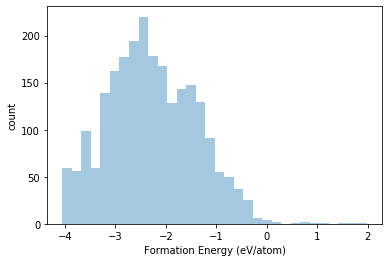

In [123]:
e_form = sns.distplot(mats_df_updated["formation_energy_per_atom"], kde=False)
e_form.set(xlabel = 'Formation Energy (eV/atom)',
          ylabel = 'count')

[Text(0, 0.5, 'count'), Text(0.5, 0, 'Band Gap (eV)')]

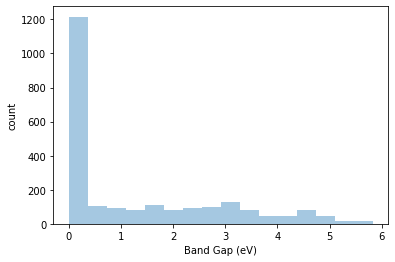

In [124]:
bg_plot = sns.distplot(mats_df_updated["band_gap"], kde=False)
bg_plot.set(xlabel = 'Band Gap (eV)',
          ylabel = 'count')

In [82]:
from io import StringIO
import requests

In [84]:
url="https://ndownloader.figshare.com/files/9158587"
raw = requests.get(url).text
OQMD_data = pd.read_csv(StringIO(raw))

In [86]:
OQMD_data.describe(include = 'all')

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
count,5329,5329,5329,5329,5329,5329,5329.000000,5329.000000,5329,5329,...,5329,5329,5329,5329,5329,5329,5329,5329,5329,5329
unique,5329,73,73,2,7,7,NaN,NaN,5,2847,...,910,4082,945,2142,2145,2581,125,126,124,4157
top,SbNpO3,Zn,Zn,False,not balanced,not balanced,NaN,NaN,cubic,-,...,0.000,-,0.000,-,-,-,90.0,90.0,90.0,-
freq,1,73,73,5107,1881,1881,NaN,NaN,3253,53,...,1148,53,4132,53,53,53,4953,4953,4953,415
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.974656,0.817846,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.337139,0.247479,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.270000,0.270000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.690000,0.630000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.930000,0.770000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.180000,0.950000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
for i in OQMD_data:
    print(i)

Chemical formula
A
B
In literature
Valence A
Valence B
Radius A [ang]
Radius B [ang]
Lowest distortion
Formation energy [eV/atom]
Stability [eV/atom]
Magnetic moment [mu_B]
Volume per atom [A^3/atom]
Band gap [eV]
a [ang]
b [ang]
c [ang]
alpha [deg]
beta [deg]
gamma [deg]
Vacancy energy [eV/O atom]


In [110]:
for i in OQMD_data["Formation energy [eV/atom]"]:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [98]:
valid_data = OQMD_data[OQMD_data["Formation energy [eV/atom]"] != '-']

In [126]:
valid_data["Formation energy [eV/atom]"].describe()

count    5276.000000
mean       -1.681050
std         0.981348
min        -3.844000
25%        -2.407250
50%        -1.751500
75%        -1.007500
max         1.879000
Name: Formation energy [eV/atom], dtype: float64

Text(0, 250, 'Mean: -1.68\nStd: 0.98')

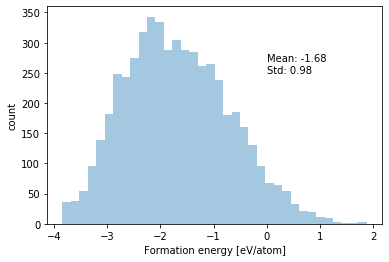

In [132]:
e_form_2 = sns.distplot(valid_data["Formation energy [eV/atom]"], kde=False)
e_form_2.set(ylabel = 'count')
e_form_2.text(0,250,"Mean: -1.68\nStd: 0.98")

In [145]:
mats_df_updated.rename(columns={"chem": "pretty formula"})

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull,molar_formation_energy_per_atom,stability,metallic_character
0,mp-1001571,CaFeO3,5,0.0000,-2.293058,[],0.051334,-221216.919640,unstable,metallic
1,mp-1016821,BaSiO3,5,0.9508,-2.860806,[],0.562072,-275988.915337,unstable,small band gap
2,mp-1016823,BaGeO3,5,0.0000,-2.480763,[],0.234014,-239325.243874,unstable,metallic
3,mp-1016828,CdIrO3,5,0.0000,-0.846333,[],0.466713,-81647.780452,unstable,metallic
4,mp-1016833,CaRhO3,5,0.0000,-1.846958,[],0.269316,-178180.584029,unstable,metallic
...,...,...,...,...,...,...,...,...,...,...
2331,mvc-4001,ZnCrO3,20,0.0984,-1.849585,[],0.137663,-178433.984136,unstable,small band gap
2332,mvc-4002,ZnMoO3,20,1.4896,-1.922145,[],0.083596,-185433.998045,unstable,large band gap
2333,mvc-4008,ZnNiO3,20,0.0000,-0.943148,[],0.181680,-90987.740822,unstable,metallic
2334,mvc-4013,ZnWO3,20,2.2105,-1.779081,[],0.161013,-171632.318431,unstable,large band gap


In [146]:
OQMD_data.rename(columns={"chem" : "Chemical Formula"})

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.732,...,0.000,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,0.000,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,0.000,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,0.000,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,0.000,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.637,...,0.339,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.126,...,0.200,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.455,...,0.000,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177
5327,ZrZnO3,Zr,Zn,False,not balanced,not balanced,0.89,0.74,cubic,-1.630,...,0.001,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762


In [147]:
mats = mats_df_updated['pretty_formula']
oqmd = OQMD_data['Chemical formula']
len(set(mats).intersection(oqmd))

1196

In [153]:
OQMD_data["abc"] = oqmd
mats_df_updated["abc"] = mats

In [162]:
pd.merge(oqmd,mats,left_on=['Chemical formula'], 
         right_on=['pretty_formula'], how = "inner")

,Chemical formula,pretty_formula
0,AcAlO3,AcAlO3
1,AcBO3,AcBO3
2,AcCrO3,AcCrO3
3,AcCuO3,AcCuO3
4,AcFeO3,AcFeO3
...,...,...
2051,ZrPbO3,ZrPbO3
2052,ZrSiO3,ZrSiO3
2053,ZrTiO3,ZrTiO3
2054,ZrTlO3,ZrTlO3


In [155]:
OQMD_data

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom],abc
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.732,...,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150,Ac2O3
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817,AcAgO3
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695,AcAlO3
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634,AcAsO3
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807,AcAuO3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.637,...,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191,ZrWO3
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.126,...,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920,ZrYO3
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.455,...,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177,ZrYbO3
5327,ZrZnO3,Zr,Zn,False,not balanced,not balanced,0.89,0.74,cubic,-1.630,...,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762,ZrZnO3
